# 逻辑回归

逻辑回归(Logistic Regression, LR)模型其实仅在线性回归的基础上，套用了一个逻辑函数，但也就由于这个逻辑函数，使得逻辑回归模型能够输出类别的概率。逻辑回归的本质是：假设数据服从这个分布，然后使用极大似然估计做参数的估计。

![theory](images/linear_logistic_regression.png)

## 1. 什么是回归

一说回归最先想到的是终结者那句：I'll be back

regress中，re表示back，gress等于go，数值go back to mean value，也就是I'll be back 的意思

在数理统计中，回归是确定多种变量相互依赖的定量关系的方法

> 通俗理解：越来越接近期望值的过程，***回归*** 于事物的本质

最简单的回归是线性回归(Linear Regression)，也就是通过最小二乘等方法得到模型的参数。线性回归假设输出变量是若干输出变量的线性组合，并根据这一关系求解线性组合中的最优系数。

通俗理解：输出一个线性函数，例如$y=f(x; \theta)$，通过寻找最优的参数$\theta$使得观测数据与模型数据相吻合。

![linear regression](images/linear_regression.png)


## 2. 逻辑回归模型
回归是一种比较容易理解的模型，就相当于$y=f(x)$，表明自变量$x$与因变量$y$的关系。

以常见的看医举例，医生治病时的望、闻、问、切，之后判定病人是否生病或生了什么病，其中的望闻问切就是获取自变量$x$，即特征数据，判断是否生病就相当于获取因变量$y$，即预测分类。$X$为数据点——肿瘤的大小，$Y$为观测值——是否是恶性肿瘤。通过构建线性回归模型，如$h_\theta(x)$所示，构建线性回归模型后，即可以根据肿瘤大小，预测是否为恶性肿瘤$h_\theta(x)) \ge 0.5$为恶性，$h_\theta(x) \lt 0.5$为良性。

![LinearRegression](images/fig1.gif)

然而线性回归的鲁棒性很差，例如在上图的数据集上建立回归，因最右边噪点的存在，使回归模型在训练集上表现都很差。这主要是由于线性回归在整个实数域内敏感度一致，而分类范围，需要在$[0,1]$。

逻辑回归就是一种减小预测范围，将预测值限定为$[0,1]$间的一种回归模型，其回归方程与回归曲线如下图所示。逻辑曲线在$z=0$时，十分敏感，在$z>>0$或$z<<0$处，都不敏感，将预测值限定为$(0,1)$。



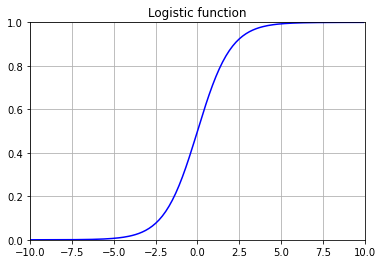

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.axis([-10,10,0,1])
plt.grid(True)
X=np.arange(-10,10,0.1)
y=1/(1+np.e**(-X))
plt.plot(X,y,'b-')
plt.title("Logistic function")
plt.savefig("fig-res-logstic_fuction.pdf")
plt.show()

### 2.1 逻辑回归表达式

这个函数称为Logistic函数(Logistic Function)，也称为Sigmoid函数(Sigmoid Function)。函数公式如下：

$$
g(z) = \frac{1}{1+e^{-z}}
$$

Logistic函数:
* 当$z$趋近于无穷大时，$g(z)$趋近于1；
* 当$z$趋近于无穷小时，$g(z)$趋近于0。

Logistic函数的图形如上图所示。Logistic函数求导时有一个特性，这个特性将在下面的推导中用到，这个特性为：
$$
g'(z) =  \frac{d}{dz} \frac{1}{1+e^{-z}} \\
      =  \frac{1}{(1+e^{-z})^2}(e^{-z}) \\
      =  \frac{1}{(1+e^{-z})} (1 - \frac{1}{(1+e^{-z})}) \\
      =  g(z)(1-g(z))
$$

逻辑回归本质上是线性回归，只是在特征到结果的映射中加入了一层函数映射，即先把特征线性求和，然后使用函数$g(z)$将做为假设函数来预测。$g(z)$可以将连续值映射到0到1之间。线性回归模型的表达式带入$g(z)$，就得到逻辑回归的表达式:

$$
h_\theta(x) = g(\theta^T x) = \frac{1}{1+e^{-\theta^T x}}
$$

### 2.2 逻辑回归的软分类

现在我们将y的取值$h_\theta(x)$通过Logistic函数归一化到(0,1)间，$y$的取值有特殊的含义，它表示结果取1的概率，因此对于输入$x$分类结果为类别1和类别0的概率分别为：

$$
P(y=1|x,\theta) = h_\theta(x) \\
P(y=0|x,\theta) = 1 - h_\theta(x)
$$

对上面的表达式合并一下就是：

$$
p(y|x,\theta) = (h_\theta(x))^y (1 - h_\theta(x))^{1-y}
$$



### 2.3 梯度上升

得到了逻辑回归的表达式，下一步跟线性回归类似，构建似然函数，然后最大似然估计，最终推导出$\theta$的迭代更新表达式。只不过这里用的不是梯度下降，而是梯度上升，因为这里是最大化似然函数。

假设训练样本相互独立，那么似然函数表达式为：
![Loss](images/eq_loss.png)

同样对似然函数取log，转换为：
![LogLoss](images/eq_logloss.png)

转换后的似然函数对$\theta$求偏导，在这里我们以只有一个训练样本的情况为例：
![LogLossDiff](images/eq_logloss_diff.png)

这个求偏导过程中：
* 第一步是对$\theta$偏导的转化，依据偏导公式：$y=lnx$, $y'=1/x$。
* 第二步是根据$g(z)$求导的特性$g'(z) = g(z)(1 - g(z))$ 。
* 第三步就是普通的变换。

这样我们就得到了梯度上升每次迭代的更新方向，那么$\theta$的迭代表达式为：
$$
\theta = \theta + \eta (y^i - h_\theta(x^i)) x_j^i
$$

其中$\eta$是学习速率。

### 1.4 示例程序

In [2]:
%matplotlib inline

#from __future__ import division
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt

np.random.seed(0)


Text(0.5, 1.0, 'Original Data')

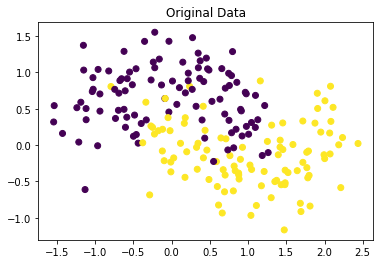

In [3]:
# load sample data
data, label = sklearn.datasets.make_moons(200, noise=0.30)

plt.scatter(data[:,0], data[:,1], c=label)
plt.savefig("fig-res-logistic_train_data.pdf")
plt.title("Original Data")

In [4]:
def plot_decision_boundary(predict_func, data, label, figName=None):
    """画出结果图
    Args:
        pred_func (callable): 预测函数
        data (numpy.ndarray): 训练数据集合
        label (numpy.ndarray): 训练数据标签
    """
    x_min, x_max = data[:, 0].min() - .5, data[:, 0].max() + .5
    y_min, y_max = data[:, 1].min() - .5, data[:, 1].max() + .5
    h = 0.01

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = predict_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)   #画出登高线并填充
    plt.scatter(data[:, 0], data[:, 1], c=label, cmap=plt.cm.Spectral)
    if figName != None: plt.savefig(figName)
    plt.show()



In [6]:

def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

class Logistic(object):
    """logistic回归模型"""
    def __init__(self, data, label):
        self.data = data
        self.label = label

        # parameters
        self.data_num, n = np.shape(data)
        self.weights = np.ones(n)
        self.b = 1

    def train(self, num_iteration=150):
        """随机梯度上升算法
        FIXME: change to same API to sklean
        Args:
            num_iteration (int): 迭代次数
        """
        # 学习速率
        alpha = 0.01
            
        for j in range(num_iteration):
            data_index = list(range(self.data_num))
            for i in range(self.data_num):
                rand_index = int(np.random.uniform(0, len(data_index)))
                error = self.label[rand_index] - \
                    sigmoid(sum(self.data[rand_index] * self.weights + self.b))
                self.weights += alpha * error * self.data[rand_index]
                self.b += alpha * error
                del(data_index[rand_index])

    def predict(self, predict_data):
        """预测函数"""
        result = list(map(lambda x: 1 if sum(self.weights * x + self.b) > 0 else 0,
                     predict_data))
        return np.array(result)


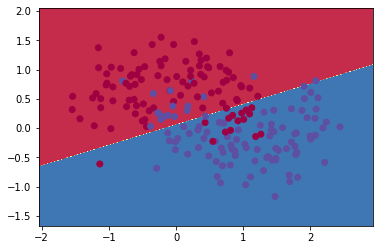

In [7]:
logistic = Logistic(data, label)
logistic.train(200)
plot_decision_boundary(lambda x: logistic.predict(x), data, label, "logistic_pred_res.pdf")

## 3. 如何用sklearn解决逻辑回归问题?

accuracy train = 0.866667
accuracy test = 0.850000


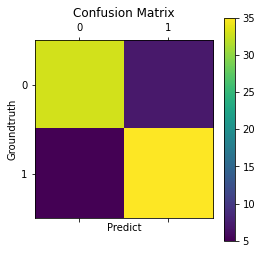

In [8]:
%matplotlib inline

import sklearn.datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 生成模拟数据
data, label = sklearn.datasets.make_moons(200, noise=0.30)

# 计算得到训练、测试数据个数
N = len(data)
N_train = int(N*0.6)
N_test = N - N_train

# 分割成训练、测试数据
x_train = data[:N_train, :]
y_train = label[:N_train]
x_test  = data[N_train:, :]
y_test  = label[N_train:]

# 进行逻辑回归
lr = LogisticRegression()
lr.fit(x_train,y_train)

# 预测
pred_train = lr.predict(x_train)
pred_test  = lr.predict(x_test)

# 计算训练/测试精度
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
print("accuracy train = %f" % acc_train)
print("accuracy test = %f" % acc_test)

# 绘制混淆矩阵
cm = confusion_matrix(y_test,pred_test)

plt.matshow(cm)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('Groundtruth')
plt.xlabel(u'Predict')
plt.savefig('fig-res-logistic_confusion_matrix.pdf')
plt.show()

## 4. 多类识别问题

### 4.1 加载显示数据

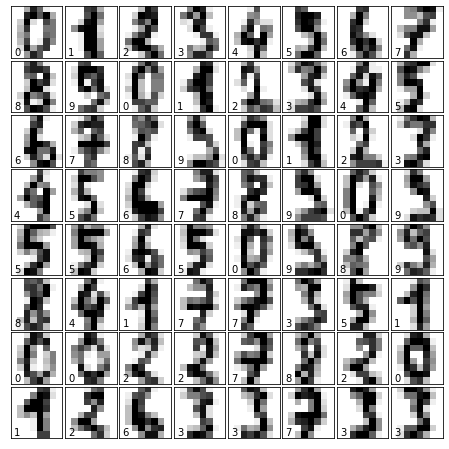

In [17]:
import matplotlib.pyplot as plt 
from sklearn.datasets import load_digits

# load data
digits = load_digits()

# copied from notebook 02_sklearn_data.ipynb
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary)
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [13]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.manifold import Isomap

import matplotlib.pyplot as plt 

# 加载示例数据
digits, dig_label = load_digits(return_X_y=True)
print(digits.shape)

# 计算训练/测试数据个数
N = len(digits)
N_train = int(N*0.8)
N_test = N - N_train

# 分割训练/测试数据集
x_train = digits[:N_train, :]
y_train = dig_label[:N_train]
x_test  = digits[N_train:, :]
y_test  = dig_label[N_train:]

# 进行逻辑回归分类
lr = LogisticRegression()
lr.fit(x_train, y_train)

pred_train = lr.predict(x_train)
pred_test  = lr.predict(x_test)

# 计算测试、训练精度
acc_train = accuracy_score(y_train, pred_train)
acc_test  = accuracy_score(y_test, pred_test)
print("accuracy train = %f, accuracy_test = %f" % (acc_train, acc_test))

score_train = lr.score(x_train, y_train)
score_test  = lr.score(x_test, y_test)
print("score_train = %f, score_test = %f" % (score_train, score_test))


(1797, 64)
accuracy train = 1.000000, accuracy_test = 0.905556
score_train = 1.000000, score_test = 0.905556


/home/bushuhui/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### 4.2 可视化特征

针对机器学习的问题，一个比较好的方法是通过降维的方法将原始的高维特征降到2-3维并可视化处理，通过这样的方法可以对所要处理的数据有一个初步的认识。这里介绍最简单的降维方法主成分分析(Principal Component Analysis, PCA)。PCA寻求具有最大方差的特征的正交线性组合，因此可以更好地了解数据的结构。在这里，我们将使用Randomized PCA，因为当数据个数$N$比较大时，计算的效率更好。


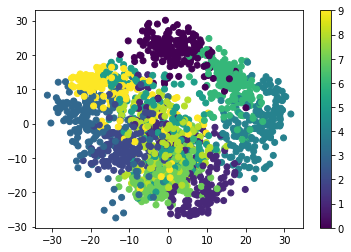

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver="randomized")
proj = pca.fit_transform(digits.data)

plt.scatter(proj[:, 0], proj[:, 1], c=dig_label)
plt.colorbar()
plt.savefig("fig-res-pca_visualize.pdf")
plt.show()

PCA的一个缺点是它可能会丢失数据中一些有趣的相互关系。如果想看到非线性的降维与映射
我们可以使用几种流形模块中的方法。在这里，我们将使用[Isomap](https://blog.csdn.net/VictoriaW/article/details/78497316)（串联
等距映射）是一种基于图论的流形降维方法。

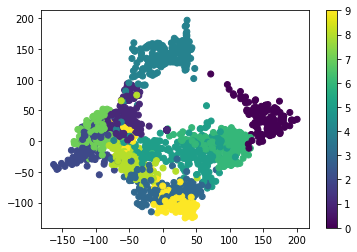

In [19]:
from sklearn.manifold import Isomap
iso = Isomap(n_neighbors=5, n_components=2)
proj = iso.fit_transform(digits.data)

plt.scatter(proj[:, 0], proj[:, 1], c=digits.target)
plt.colorbar()
plt.savefig("fig-res-isomap_visualize.pdf")
plt.show()

### 4.3 示例程序

In [20]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.manifold import Isomap

import matplotlib.pyplot as plt 

# 加载示例数据
digits, dig_label = load_digits(return_X_y=True)
print(digits.shape)

# 进行特征降维
feature_trans = True
if feature_trans:
    iso = Isomap(n_neighbors=5, n_components=8)
    digits = iso.fit_transform(digits)

# 计算训练/测试数据个数
N = len(digits)
N_train = int(N*0.8)
N_test = N - N_train

# 分割训练/测试数据集
x_train = digits[:N_train, :]
y_train = dig_label[:N_train]
x_test  = digits[N_train:, :]
y_test  = dig_label[N_train:]

# 进行逻辑回归分类
lr = LogisticRegression()
lr.fit(x_train,y_train)

pred_train = lr.predict(x_train)
pred_test  = lr.predict(x_test)

# 计算测试、训练精度
acc_train = accuracy_score(y_train, pred_train)
acc_test  = accuracy_score(y_test, pred_test)
print("accuracy train = %f, accuracy_test = %f" % (acc_train, acc_test))

score_train = lr.score(x_train, y_train)
score_test  = lr.score(x_test, y_test)
print("score_train = %f, score_test = %f" % (score_train, score_test))



(1797, 64)
accuracy train = 0.995825, accuracy_test = 0.961111
score_train = 0.995825, score_test = 0.961111


/home/bushuhui/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


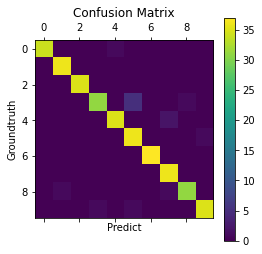

In [21]:
from sklearn.metrics import confusion_matrix

# plot confusion matrix
cm = confusion_matrix(y_test,pred_test)

plt.matshow(cm)
plt.title(u'Confusion Matrix')
plt.colorbar()
plt.ylabel(u'Groundtruth')
plt.xlabel(u'Predict')
plt.savefig("fig-res-sklean_isomap_confusion_matrix.pdf")
plt.show()

## 5. 深入思考

1. 如何得到错误分类数据的下标？
2. 如何根据下标，将这些错误的数据可视化出来？

## References

* [逻辑回归模型(Logistic Regression, LR)基础](https://www.cnblogs.com/sparkwen/p/3441197.html)
* [逻辑回归（Logistic Regression）](http://www.cnblogs.com/BYRans/p/4713624.html)